## Supermarket Sales Analysis

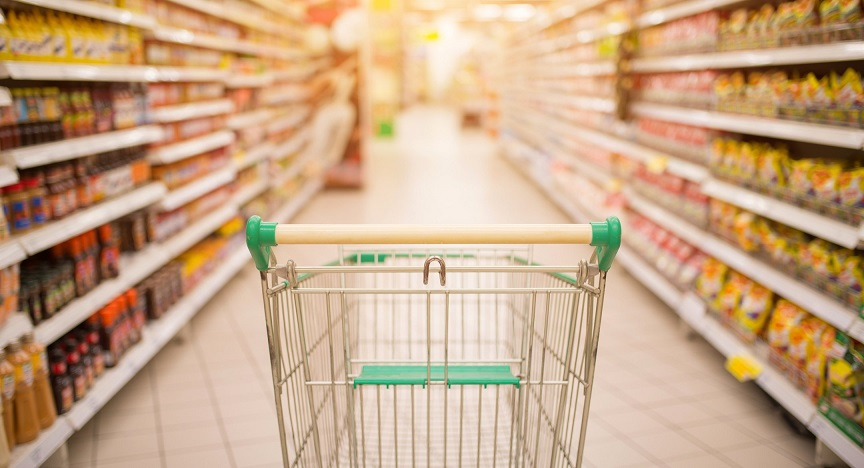

This data was downloaded from Kaggle.

In this data analysis, we will explore the sales of unnamed supermarket. The following questions will be answered through our in-depth analysis:

 - Exploring Data
 - Gross Income
 - Product Ratings, Purchases Time, Payment Type
 - Gender and Customer Type
 - Sales by Branches

### Importing necessary libraries and loading data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette("pastel")

df = pd.read_csv("supermarket_sales - Sheet1.csv")

### Exploring Data

In [2]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [4]:
df.columns = df.columns.str.title().str.replace(' ', '_')

In [5]:
df.shape

(1000, 17)

Total record in dataset = 1000<br>  Columns in the dataset = 17

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice_Id               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer_Type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product_Line             1000 non-null   object 
 6   Unit_Price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax_5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  Cogs                     1000 non-null   float64
 14  Gross_Margin_Percentage  

In [7]:
df.isnull().sum()

Invoice_Id                 0
Branch                     0
City                       0
Customer_Type              0
Gender                     0
Product_Line               0
Unit_Price                 0
Quantity                   0
Tax_5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
Cogs                       0
Gross_Margin_Percentage    0
Gross_Income               0
Rating                     0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(["Invoice_Id"], axis=1, inplace=True)
df["Date"] = pd.to_datetime(df["Date"])
df["Time"] = pd.to_datetime(df["Time"])

None of the columns have NaN values. There are no duplicated values. I made some technical changes: changed syntax of column headings, removed the unnecessary "Invoice_Id", changed "Date" and "Time" columns dtypes.

In [10]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Unit_Price,1000.0,55.67,26.49,10.08,32.88,55.23,77.94,99.96
Quantity,1000.0,5.51,2.92,1.00,3.00,5.00,8.00,10.00
Tax_5%,1000.0,15.38,11.71,0.51,5.92,12.09,22.45,49.65
Total,1000.0,322.97,245.89,10.68,124.42,253.85,471.35,1042.65
Cogs,1000.0,307.59,234.18,10.17,118.50,241.76,448.90,993.00
Gross_Margin_Percentage,1000.0,4.76,0.00,4.76,4.76,4.76,4.76,4.76
Gross_Income,1000.0,15.38,11.71,0.51,5.92,12.09,22.45,49.65
Rating,1000.0,6.97,1.72,4.00,5.50,7.00,8.50,10.00


Descriptive statistics summary of data.

### Gross Income

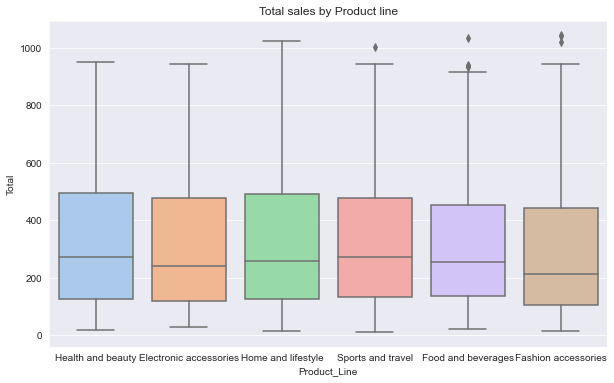

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df.Total, x=df['Product_Line'])
plt.title("Total sales by Product line");

In [12]:
df.pivot_table(index='Product_Line', values='Gross_Income', aggfunc='sum', margins=True)

,Gross_Income
Product_Line,
Electronic accessories,2587.5015
Fashion accessories,2585.9950
Food and beverages,2673.5640
Health and beauty,2342.5590
Home and lifestyle,2564.8530
Sports and travel,2624.8965
All,15379.3690


In [13]:
df['Gross_Margin_Percentage'].nunique()

1

The total gross income is 15379.37. There is not much difference in the sales of different products here. The more profitable products were: Food & Drink (2673.56) and Sports & Travel (2624.90). Health and beauty brought the lowest income (2342.56). But percentage-wise, the products are equally profitable as they all have a gross margin of 4.76%.

### Date

In [14]:
df.Date.sort_values().head(3)

856   2019-01-01
567   2019-01-01
245   2019-01-01
Name: Date, dtype: datetime64[ns]

In [15]:
df.Date.sort_values().tail(3)

963   2019-03-30
937   2019-03-30
474   2019-03-30
Name: Date, dtype: datetime64[ns]

In [16]:
from datetime import date
d0 = date(2019, 1, 1)
d1 = date(2019, 3, 9)
print(d1 - d0)
print(len(df.Date))

67 days, 0:00:00
1000


67 days of sales in our dataset, the first date is 01/01/2019 and the last day is 03/09/2019. The number of sales records for these days is 1000.

In [17]:
df.groupby('Date')['Total'].sum().reset_index().nlargest(10, columns='Total')

,Date,Total
67,2019-03-09,7474.0470
37,2019-02-07,7228.2105
72,2019-03-14,7214.6340
45,2019-02-15,6830.7855
60,2019-03-02,6560.3055
63,2019-03-05,6230.8785
22,2019-01-23,5994.1875
14,2019-01-15,5944.2600
57,2019-02-27,5859.4515
77,2019-03-19,5740.3920


Top 10 days with highest sales.

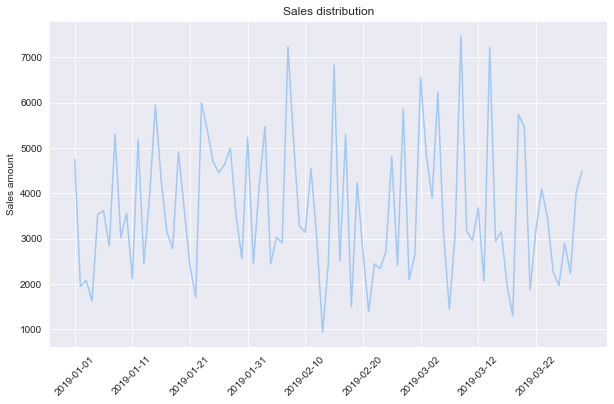

In [18]:
df_temp = df.groupby('Date')['Total'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(df_temp['Date'], df_temp['Total'])
plt.title("Sales distribution")
plt.ylabel('Sales amount')
ax = plt.gca()
ticks_to_use = df_temp['Date'][::10]
ax.set_xticks(ticks_to_use);
plt.xticks(rotation=45);

In [19]:
df.groupby(['Date', 'Product_Line'])['Total'].sum().reset_index().nlargest(10, columns='Total')

,Date,Product_Line,Total
446,2019-03-29,Health and beauty,2809.4220
137,2019-01-28,Health and beauty,2532.4215
36,2019-01-08,Food and beverages,2473.0335
150,2019-01-31,Electronic accessories,2366.5950
194,2019-02-08,Sports and travel,2264.0730
185,2019-02-07,Electronic accessories,2260.5450
367,2019-03-14,Electronic accessories,2136.2460
191,2019-02-08,Fashion accessories,2115.8760
304,2019-03-02,Home and lifestyle,2112.9255
151,2019-01-31,Fashion accessories,2058.2940


Top 10 days with highest sales by Product_Line.

### Product Ratings

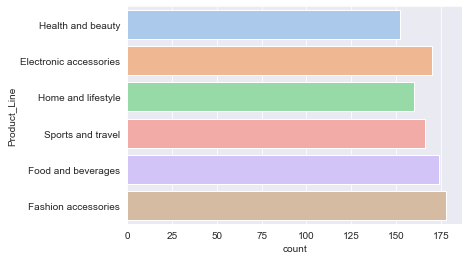

In [20]:
sns.countplot(data=df, y=df['Product_Line']);

In terms of the number of goods sold, Fashion accessories (178) is leading by a small margin. And the least selling product is Health and beauty (152).

In [21]:
df.pivot_table(index='Product_Line', values='Rating', aggfunc=['count', 'mean'], margins=True)

,count,mean
,Rating,Rating
Product_Line,,
Electronic accessories,170,6.924706
Fashion accessories,178,7.029213
Food and beverages,174,7.113218
Health and beauty,152,7.003289
Home and lifestyle,160,6.837500
Sports and travel,166,6.916265
All,1000,6.972700


Food and beverages, Fashion accessories, and Health and beauty rank slightly higher.

### Payment Type

In [22]:
df.pivot_table(index='Payment', values='Total', aggfunc='sum', margins=True)

,Total
Payment,
Cash,112206.570
Credit card,100767.072
Ewallet,109993.107
All,322966.749


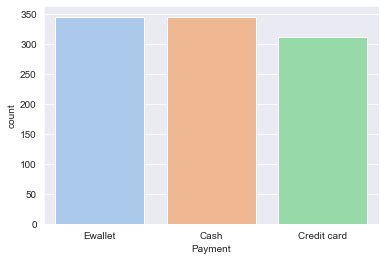

In [23]:
sns.countplot(x=df["Payment"], data=df);

In general, there is no big difference in the type of payment. The credit card is used a little less.

### Gender and Customer Type

In [24]:
df.pivot_table(index=['Gender', 'Product_Line'], values='Total', aggfunc='sum', margins=True).round(2)

Total
Gender Product_Line                     
Female Electronic accessories   27102.02
       Fashion accessories      30437.40
       Food and beverages       33170.92
       Health and beauty        18560.99
       Home and lifestyle       30036.88
       Sports and travel        28574.72
Male   Electronic accessories   27235.51
       Fashion accessories      23868.50
       Food and beverages       22973.93
       Health and beauty        30632.75
       Home and lifestyle       23825.04
       Sports and travel        26548.11
All                            322966.75

Female shoppers mainly buy Food and beverages (33170.92), Fashion accessories (30437.40) and Home and lifestyle	 (30036.88).<br> However, male shoppers spent the most money on Health and beauty (30632.75), which surprised me a lot.

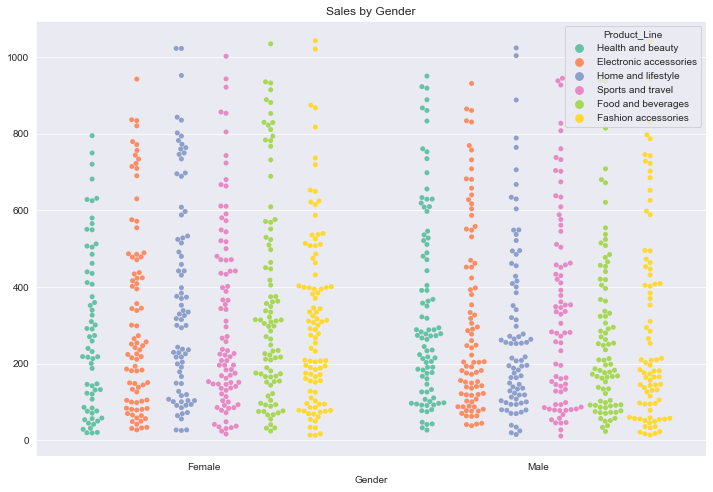

In [25]:
plt.figure(figsize=(12, 8))
ax = sns.swarmplot(data=df, x="Gender", y="Total", hue="Product_Line",  palette="Set2", dodge=True)
ax.set(ylabel="")
plt.title("Sales by Gender");

In [26]:
df.pivot_table(index='Gender', values=['Total'], aggfunc='sum', margins=True)

,Total
Gender,
Female,167882.925
Male,155083.824
All,322966.749


Overall, females bought more products than males.

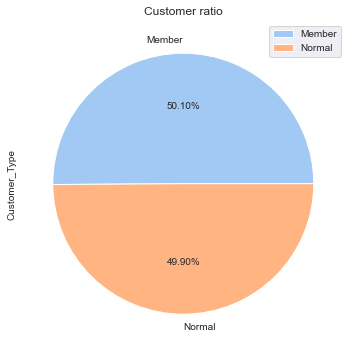

In [27]:
plt.figure(figsize=(8, 6))
df["Customer_Type"].value_counts().plot(kind="pie", autopct="%1.2f%%")
plt.legend()
plt.title('Сustomer ratio');

The ratio of purchases from members and non-members is almost the same.

In [28]:
df.pivot_table(index=['Gender', 'Customer_Type'], values=['Total'], aggfunc='sum', margins=True)

Total
Gender Customer_Type             
Female Member          88146.9435
       Normal          79735.9815
Male   Member          76076.5005
       Normal          79007.3235
All                   322966.7490

Female-members bought more products, while male-members, on the contrary, made fewer purchases.

### Sales by Branches

In [29]:
df.pivot_table(index=['Branch', 'City', 'Product_Line'], values=['Total'], aggfunc='sum', margins=True)

Total
Branch City      Product_Line                       
A      Yangon    Electronic accessories   18317.1135
                 Fashion accessories      16332.5085
                 Food and beverages       17163.1005
                 Health and beauty        12597.7530
                 Home and lifestyle       22417.1955
                 Sports and travel        19372.6995
B      Mandalay  Electronic accessories   17051.4435
                 Fashion accessories      16413.3165
                 Food and beverages       15214.8885
                 Health and beauty        19980.6600
                 Home and lifestyle       17549.1645
                 Sports and travel        19988.1990
C      Naypyitaw Electronic accessories   18968.9745
                 Fashion accessories      21560.0700
                 Food and beverages       23766.8550
                 Health and beauty        16615.3260
                 Home and lifestyle       13895.5530
                 Sports and travel        15761.9280
All                                      322966.7490

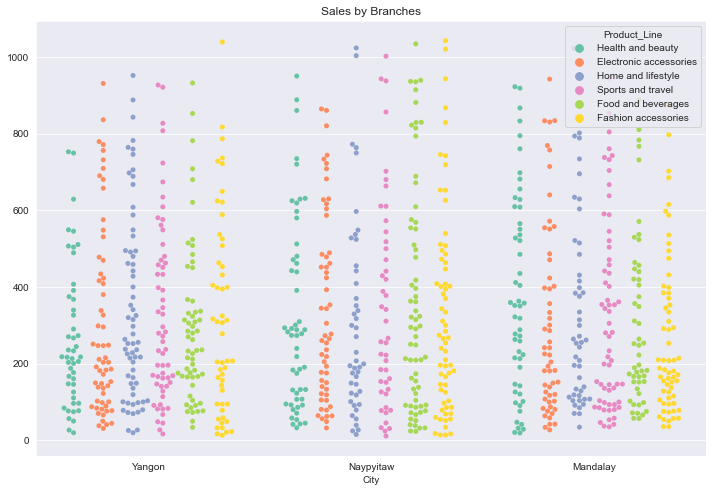

In [30]:
plt.figure(figsize=(12, 8))
ax = sns.swarmplot(data=df, x="City", y="Total", hue="Product_Line",  palette="Set2", dodge=True)
ax.set(ylabel="")
plt.title("Sales by Branches");

In [31]:
df.pivot_table(index=['Branch', 'City'], values=['Total'], aggfunc='sum', margins=True)

,,Total
Branch,City,
A,Yangon,106200.3705
B,Mandalay,106197.6720
C,Naypyitaw,110568.7065
All,,322966.7490


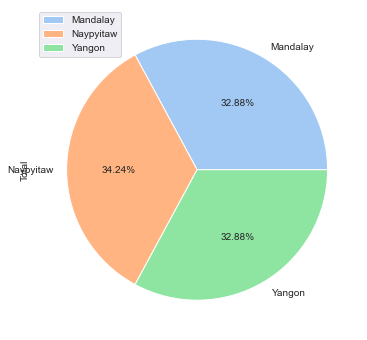

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
df.pivot_table(index='City', aggfunc='sum').plot.pie(y='Total', autopct='%1.2f%%', ax=ax)
ax.legend(loc='upper left');

In general, there is a slight difference in the sales of the three branches.

### Correlation

In [33]:
df.columns.values

array(['Branch', 'City', 'Customer_Type', 'Gender', 'Product_Line',
       'Unit_Price', 'Quantity', 'Tax_5%', 'Total', 'Date', 'Time',
       'Payment', 'Cogs', 'Gross_Margin_Percentage', 'Gross_Income',
       'Rating'], dtype=object)

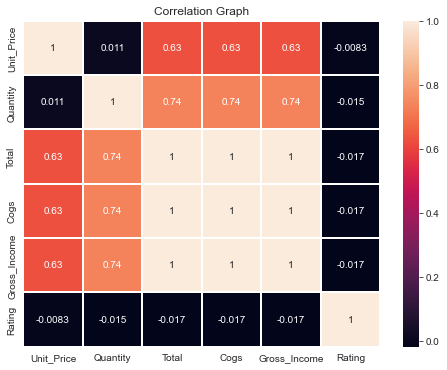

In [34]:
corr = df[['Branch', 'City', 'Customer_Type', 'Gender', 'Product_Line', 'Unit_Price', 'Quantity', 'Total', 'Date', 'Payment', 'Cogs', 'Gross_Income', 'Rating']].corr(method='spearman')
plt.figure(figsize=(8, 6))
plt.title("Correlation Graph")
sns.heatmap(corr, annot=True, linewidths=0.2, linecolor='white');

I do not see any unusual correlations...

### Conclusion

* Total record in dataset = 1000, columns in the dataset = 17

* 67 days of sales in our dataset, the first date is 01/01/2019 and the last day is 03/09/2019. The number of sales records for these days is 1000.

* The total gross income is 15379.37. There is not much difference in the sales of different products here. The more profitable products were: Food & Drink (2673.56) and Sports & Travel (2624.90). Health and beauty brought the lowest income (2342.56). But percentage-wise, the products are equally profitable as they all have a gross margin of 4.76%.

* In terms of the number of goods sold, Fashion accessories (178) is leading by a small margin. And the least selling product is Health and beauty (152).

* Food and beverages, Fashion accessories, and Health and beauty rank slightly higher.

* In general, there is no big difference in the type of payment. The credit card is used a little less.

* Female shoppers mainly buy Food and beverages (33170.92), Fashion accessories (30437.40) and Home and lifestyle (30036.88).

* However, male shoppers spent the most money on Health and beauty (30632.75), which surprised me a lot.

* Overall, females bought more products than males.

* The ratio of purchases from members and non-members is almost the same.

* Female-members bought more products, while male-members, on the contrary, made fewer purchases.

* In general, there is a slight difference in the sales of the three branches.

* No unusual correlations: Unit_Price, Quantity have a strong correlation with Total, Cogs and Gros_Income and vice versa.


Note: This data analysis case will be subjected to further updates. For example, at what time of the day there were more sales, what days of the week...